In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses,Input
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [48]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]**2))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]**2))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

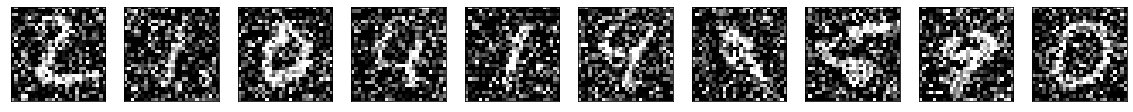

In [49]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [53]:
loss_dict = {"adam":0.0,"rmsprop":0.0,"adadelta":0.0,"adagrad":0.0,"nadam":0.0,"sgd":0.0}
def train_model(factor,input_layer,output_layer,optimizer,epochs,batch_size):
    noise_factor = factor
    x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
    x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)
    
    
    autoencoder = Model(input_layer,output_layer)
    autoencoder.compile(optimizer=optimizer,loss = "binary_crossentropy",metrics = ["mean_squared_error"])
#     print(autoencoder.summary())
    print("With", optimizer,"optimizer and noise factor",factor)
    hist = autoencoder.fit(x_train_noisy,x_train,epochs = epochs,batch_size = batch_size,validation_data = (x_test_noisy,x_test))
    loss_dict[optimizer] = hist.history["val_loss"][-1]
    decoded_images = autoencoder.predict(x_test)
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(1, n + 1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # Display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [54]:
input_image = Input(shape=(784,))
encoded = Dense(784,activation = "relu")(input_image)
encoded = Dense(392,activation = "relu")(encoded)
encoded = Dense(196,activation = "relu")(encoded)
encoded = Dense(128,activation = "relu")(encoded)
decoded = Dense(196,activation = "relu")(encoded)
decoded = Dense(392,activation = "relu")(decoded)
decoded = Dense(784,activation = "sigmoid")(decoded)

With adam optimizer and noise factor 0.2
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0951 - mean_squared_error: 0.0108 - val_loss: 0.0927 - val_mean_squared_error: 0.0101
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - mean_squared_error: 0.0093 - val_loss: 0.0906 - val_mean_squared_error: 0.0095
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0879 - mean_squared_error: 0.0086 - val_loss: 0.0889 - val_mean_squared_error: 0.0089
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0863 - mean_squared_error: 0.0081 - val_loss: 0.0881 - val_mean_squared_error: 0.0087
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0852 - mean_squared_error: 0.0077 - val_loss: 0.0871 - val_mean_squared_error: 0.0083
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0843 - mean_squared_error: 0.0074 - val_loss: 0.0868 - val_mean_squared_e

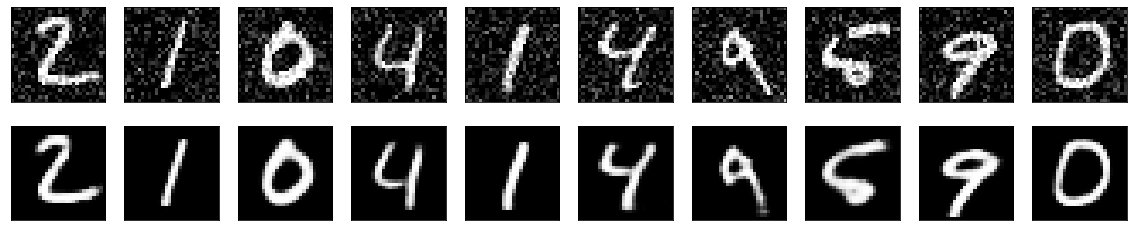

With adam optimizer and noise factor 0.4
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0971 - mean_squared_error: 0.0115 - val_loss: 0.0970 - val_mean_squared_error: 0.0115
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0941 - mean_squared_error: 0.0106 - val_loss: 0.0969 - val_mean_squared_error: 0.0114
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0926 - mean_squared_error: 0.0101 - val_loss: 0.0961 - val_mean_squared_error: 0.0112
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0915 - mean_squared_error: 0.0097 - val_loss: 0.0961 - val_mean_squared_error: 0.0112
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0905 - mean_squared_error: 0.0094 - val_loss: 0.0960 - val_mean_squared_error: 0.0112
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0897 - mean_squared_error: 0.0092 - val_loss: 0.0959 - val_mean_squared_e

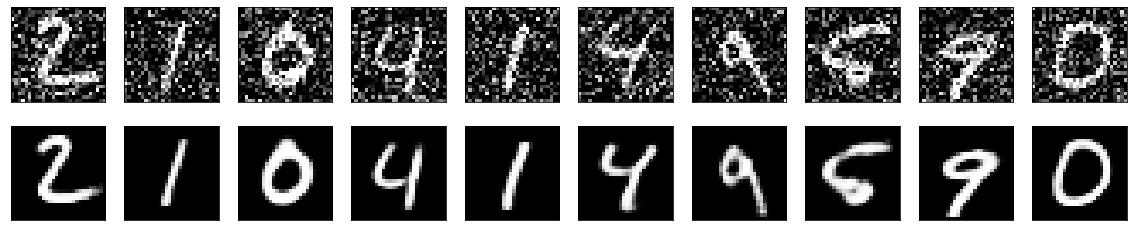

With adam optimizer and noise factor 0.6
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1136 - mean_squared_error: 0.0168 - val_loss: 0.1126 - val_mean_squared_error: 0.0164
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1086 - mean_squared_error: 0.0152 - val_loss: 0.1118 - val_mean_squared_error: 0.0162
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1061 - mean_squared_error: 0.0145 - val_loss: 0.1117 - val_mean_squared_error: 0.0161
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1043 - mean_squared_error: 0.0139 - val_loss: 0.1121 - val_mean_squared_error: 0.0163
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1027 - mean_squared_error: 0.0134 - val_loss: 0.1127 - val_mean_squared_error: 0.0163
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1013 - mean_squared_error: 0.0129 - val_loss: 0.1126 - val_mean_squared_e

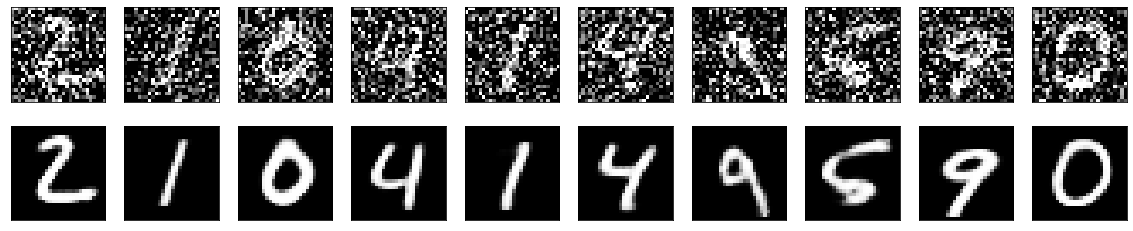

With adam optimizer and noise factor 0.8
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1334 - mean_squared_error: 0.0231 - val_loss: 0.1316 - val_mean_squared_error: 0.0226
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1264 - mean_squared_error: 0.0210 - val_loss: 0.1308 - val_mean_squared_error: 0.0223
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1226 - mean_squared_error: 0.0198 - val_loss: 0.1302 - val_mean_squared_error: 0.0221
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1197 - mean_squared_error: 0.0189 - val_loss: 0.1308 - val_mean_squared_error: 0.0223
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1174 - mean_squared_error: 0.0181 - val_loss: 0.1313 - val_mean_squared_error: 0.0223
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1155 - mean_squared_error: 0.0175 - val_loss: 0.1325 - val_mean_squared_e

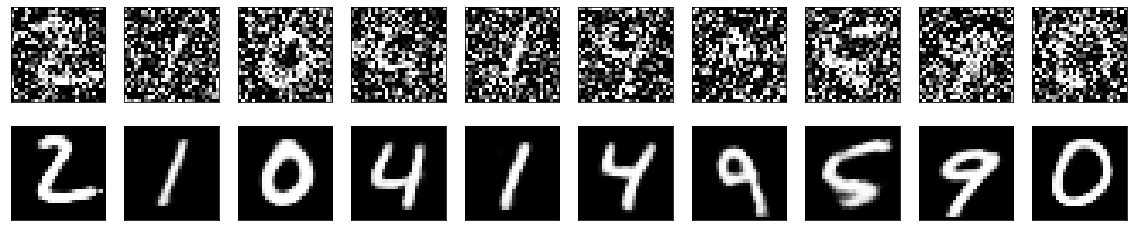

With adam optimizer and noise factor 0.9
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1434 - mean_squared_error: 0.0263 - val_loss: 0.1413 - val_mean_squared_error: 0.0257
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1355 - mean_squared_error: 0.0239 - val_loss: 0.1402 - val_mean_squared_error: 0.0253
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1313 - mean_squared_error: 0.0226 - val_loss: 0.1400 - val_mean_squared_error: 0.0253
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1282 - mean_squared_error: 0.0216 - val_loss: 0.1406 - val_mean_squared_error: 0.0253
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1256 - mean_squared_error: 0.0208 - val_loss: 0.1419 - val_mean_squared_error: 0.0257
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1233 - mean_squared_error: 0.0201 - val_loss: 0.1422 - val_mean_squared_e

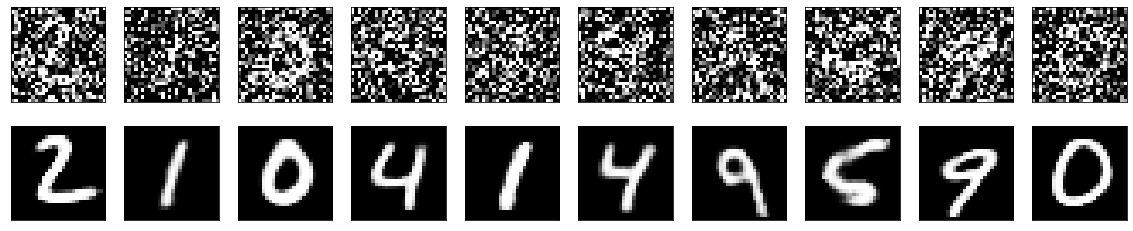

With adam optimizer and noise factor 0.99
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1525 - mean_squared_error: 0.0293 - val_loss: 0.1511 - val_mean_squared_error: 0.0289
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1442 - mean_squared_error: 0.0267 - val_loss: 0.1492 - val_mean_squared_error: 0.0282
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1397 - mean_squared_error: 0.0253 - val_loss: 0.1489 - val_mean_squared_error: 0.0281
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1362 - mean_squared_error: 0.0242 - val_loss: 0.1492 - val_mean_squared_error: 0.0281
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1333 - mean_squared_error: 0.0233 - val_loss: 0.1502 - val_mean_squared_error: 0.0285
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1309 - mean_squared_error: 0.0226 - val_loss: 0.1508 - val_mean_squared_

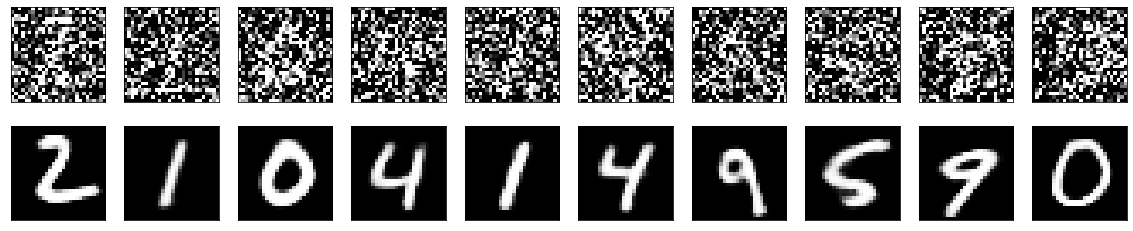

With rmsprop optimizer and noise factor 0.2
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.0989 - mean_squared_error: 0.0120 - val_loss: 0.0979 - val_mean_squared_error: 0.0118
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0934 - mean_squared_error: 0.0103 - val_loss: 0.0930 - val_mean_squared_error: 0.0102
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0914 - mean_squared_error: 0.0097 - val_loss: 0.0917 - val_mean_squared_error: 0.0098
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - mean_squared_error: 0.0093 - val_loss: 0.0934 - val_mean_squared_error: 0.0104
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0894 - mean_squared_error: 0.0090 - val_loss: 0.0933 - val_mean_squared_error: 0.0102
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0887 - mean_squared_error: 0.0088 - val_loss: 0.0904 - val_mean_square

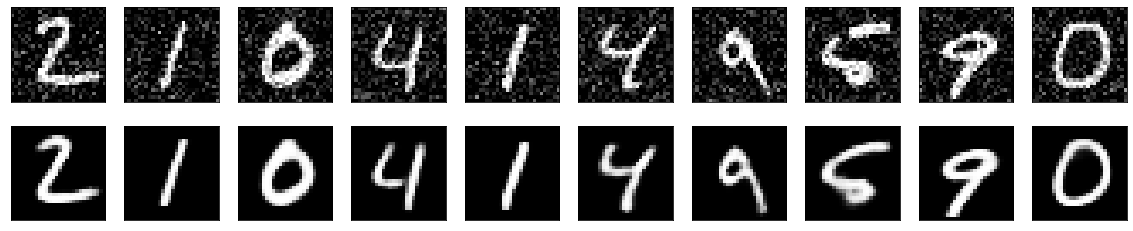

With rmsprop optimizer and noise factor 0.4
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.0992 - mean_squared_error: 0.0121 - val_loss: 0.1008 - val_mean_squared_error: 0.0125
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0971 - mean_squared_error: 0.0115 - val_loss: 0.0992 - val_mean_squared_error: 0.0121
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0960 - mean_squared_error: 0.0112 - val_loss: 0.0999 - val_mean_squared_error: 0.0124
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0951 - mean_squared_error: 0.0109 - val_loss: 0.0985 - val_mean_squared_error: 0.0119
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0945 - mean_squared_error: 0.0107 - val_loss: 0.0993 - val_mean_squared_error: 0.0123
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0938 - mean_squared_error: 0.0105 - val_loss: 0.1001 - val_mean_square

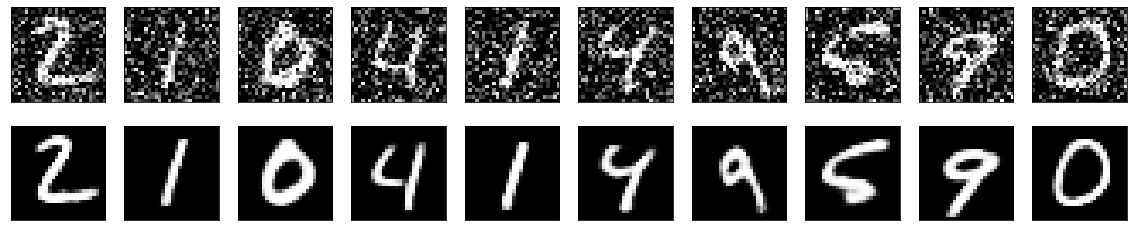

With rmsprop optimizer and noise factor 0.6
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.1150 - mean_squared_error: 0.0172 - val_loss: 0.1141 - val_mean_squared_error: 0.0169
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1111 - mean_squared_error: 0.0160 - val_loss: 0.1142 - val_mean_squared_error: 0.0170
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1089 - mean_squared_error: 0.0153 - val_loss: 0.1134 - val_mean_squared_error: 0.0167
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1073 - mean_squared_error: 0.0148 - val_loss: 0.1131 - val_mean_squared_error: 0.0165
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1061 - mean_squared_error: 0.0144 - val_loss: 0.1141 - val_mean_squared_error: 0.0169
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1051 - mean_squared_error: 0.0141 - val_loss: 0.1152 - val_mean_square

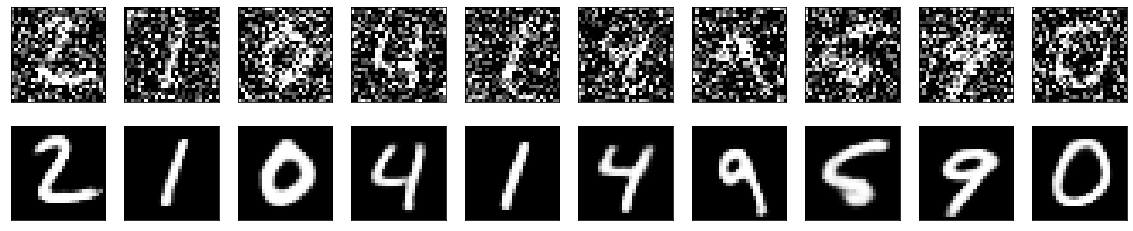

With rmsprop optimizer and noise factor 0.8
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.1345 - mean_squared_error: 0.0233 - val_loss: 0.1351 - val_mean_squared_error: 0.0235
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1287 - mean_squared_error: 0.0216 - val_loss: 0.1375 - val_mean_squared_error: 0.0242
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1252 - mean_squared_error: 0.0206 - val_loss: 0.1336 - val_mean_squared_error: 0.0229
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1229 - mean_squared_error: 0.0198 - val_loss: 0.1334 - val_mean_squared_error: 0.0229
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1210 - mean_squared_error: 0.0192 - val_loss: 0.1330 - val_mean_squared_error: 0.0228
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1194 - mean_squared_error: 0.0187 - val_loss: 0.1339 - val_mean_square

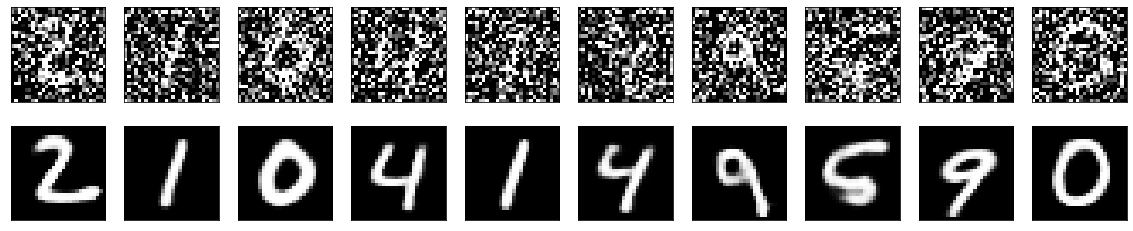

With rmsprop optimizer and noise factor 0.9
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1448 - mean_squared_error: 0.0266 - val_loss: 0.1448 - val_mean_squared_error: 0.0267
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1385 - mean_squared_error: 0.0248 - val_loss: 0.1450 - val_mean_squared_error: 0.0264
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1348 - mean_squared_error: 0.0236 - val_loss: 0.1467 - val_mean_squared_error: 0.0273
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1319 - mean_squared_error: 0.0227 - val_loss: 0.1435 - val_mean_squared_error: 0.0262
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1296 - mean_squared_error: 0.0220 - val_loss: 0.1436 - val_mean_squared_error: 0.0262
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1277 - mean_squared_error: 0.0214 - val_loss: 0.1443 - val_mean_square

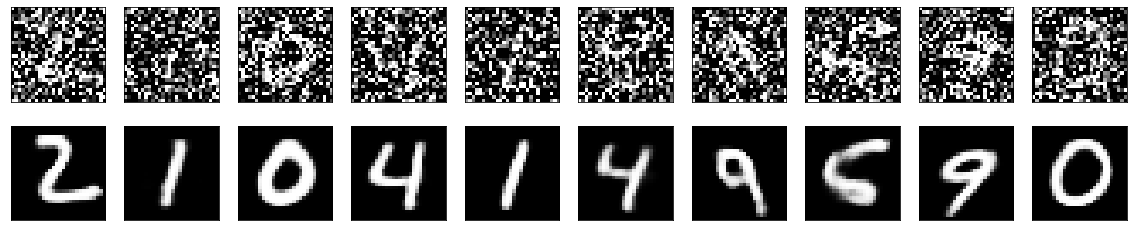

With rmsprop optimizer and noise factor 0.99
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1543 - mean_squared_error: 0.0297 - val_loss: 0.1518 - val_mean_squared_error: 0.0290
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1475 - mean_squared_error: 0.0276 - val_loss: 0.1534 - val_mean_squared_error: 0.0295
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1434 - mean_squared_error: 0.0264 - val_loss: 0.1531 - val_mean_squared_error: 0.0294
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1403 - mean_squared_error: 0.0255 - val_loss: 0.1528 - val_mean_squared_error: 0.0292
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1378 - mean_squared_error: 0.0247 - val_loss: 0.1537 - val_mean_squared_error: 0.0293
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1356 - mean_squared_error: 0.0240 - val_loss: 0.1541 - val_mean_squar

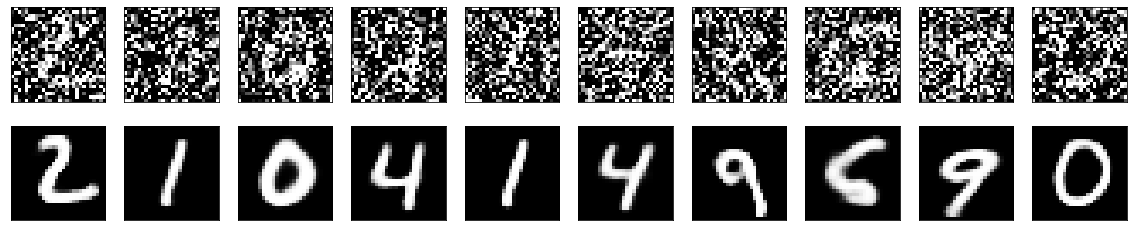

With adadelta optimizer and noise factor 0.2
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1383 - mean_squared_error: 0.0222 - val_loss: 0.1350 - val_mean_squared_error: 0.0215
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1316 - mean_squared_error: 0.0207 - val_loss: 0.1294 - val_mean_squared_error: 0.0202
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1269 - mean_squared_error: 0.0196 - val_loss: 0.1257 - val_mean_squared_error: 0.0193
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1238 - mean_squared_error: 0.0188 - val_loss: 0.1232 - val_mean_squared_error: 0.0187
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1216 - mean_squared_error: 0.0183 - val_loss: 0.1215 - val_mean_squared_error: 0.0183
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1201 - mean_squared_error: 0.0179 - val_loss: 0.1203 - val_mean_squar

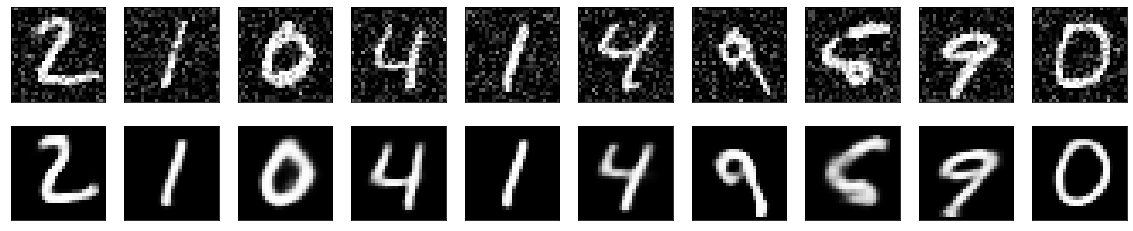

With adadelta optimizer and noise factor 0.4
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1156 - mean_squared_error: 0.0170 - val_loss: 0.1164 - val_mean_squared_error: 0.0173
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1154 - mean_squared_error: 0.0170 - val_loss: 0.1163 - val_mean_squared_error: 0.0173
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1152 - mean_squared_error: 0.0169 - val_loss: 0.1161 - val_mean_squared_error: 0.0172
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1151 - mean_squared_error: 0.0169 - val_loss: 0.1160 - val_mean_squared_error: 0.0172
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1150 - mean_squared_error: 0.0168 - val_loss: 0.1159 - val_mean_squared_error: 0.0171
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1148 - mean_squared_error: 0.0168 - val_loss: 0.1158 - val_mean_squar

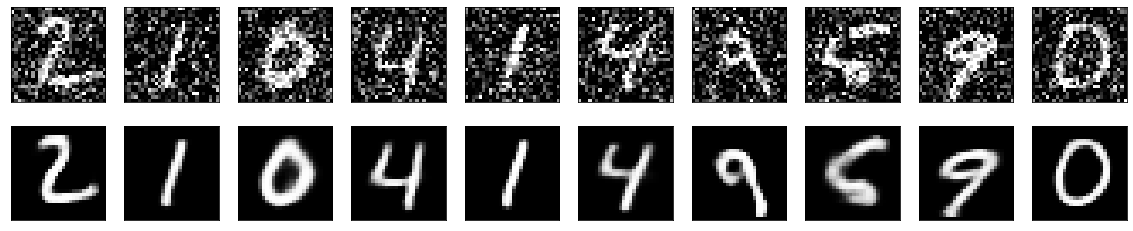

With adadelta optimizer and noise factor 0.6
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1211 - mean_squared_error: 0.0189 - val_loss: 0.1219 - val_mean_squared_error: 0.0192
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1208 - mean_squared_error: 0.0188 - val_loss: 0.1217 - val_mean_squared_error: 0.0191
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1206 - mean_squared_error: 0.0188 - val_loss: 0.1215 - val_mean_squared_error: 0.0191
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1205 - mean_squared_error: 0.0187 - val_loss: 0.1214 - val_mean_squared_error: 0.0191
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1204 - mean_squared_error: 0.0187 - val_loss: 0.1213 - val_mean_squared_error: 0.0190
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1204 - mean_squared_error: 0.0187 - val_loss: 0.1213 - val_mean_squar

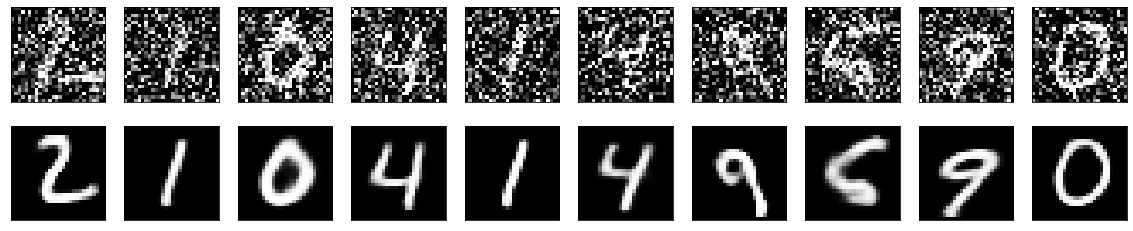

With adadelta optimizer and noise factor 0.8
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1345 - mean_squared_error: 0.0232 - val_loss: 0.1347 - val_mean_squared_error: 0.0233
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1341 - mean_squared_error: 0.0231 - val_loss: 0.1345 - val_mean_squared_error: 0.0233
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1339 - mean_squared_error: 0.0231 - val_loss: 0.1343 - val_mean_squared_error: 0.0232
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1338 - mean_squared_error: 0.0230 - val_loss: 0.1342 - val_mean_squared_error: 0.0232
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1337 - mean_squared_error: 0.0230 - val_loss: 0.1341 - val_mean_squared_error: 0.0232
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1336 - mean_squared_error: 0.0230 - val_loss: 0.1341 - val_mean_squar

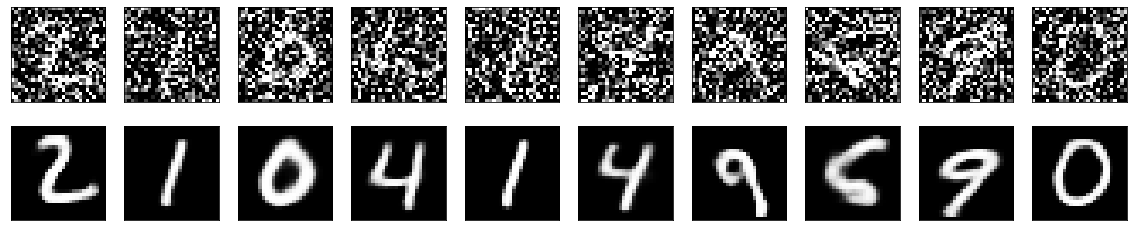

With adadelta optimizer and noise factor 0.9
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1428 - mean_squared_error: 0.0259 - val_loss: 0.1433 - val_mean_squared_error: 0.0261
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1427 - mean_squared_error: 0.0259 - val_loss: 0.1432 - val_mean_squared_error: 0.0261
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1426 - mean_squared_error: 0.0259 - val_loss: 0.1431 - val_mean_squared_error: 0.0261
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1425 - mean_squared_error: 0.0258 - val_loss: 0.1431 - val_mean_squared_error: 0.0261
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1425 - mean_squared_error: 0.0258 - val_loss: 0.1430 - val_mean_squared_error: 0.0260
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1424 - mean_squared_error: 0.0258 - val_loss: 0.1430 - val_mean_squar

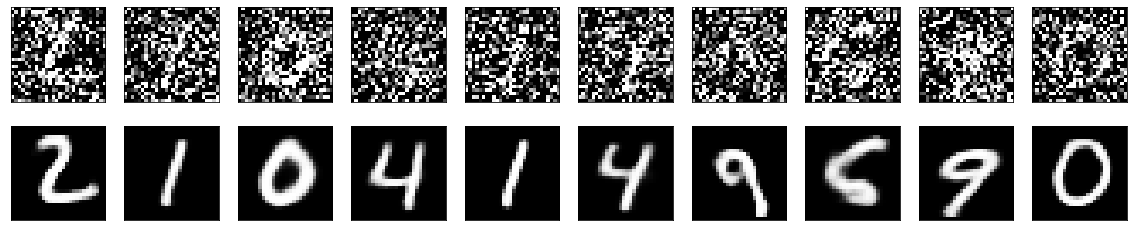

With adadelta optimizer and noise factor 0.99
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1518 - mean_squared_error: 0.0288 - val_loss: 0.1518 - val_mean_squared_error: 0.0289
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1517 - mean_squared_error: 0.0288 - val_loss: 0.1518 - val_mean_squared_error: 0.0289
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1517 - mean_squared_error: 0.0288 - val_loss: 0.1517 - val_mean_squared_error: 0.0289
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1516 - mean_squared_error: 0.0288 - val_loss: 0.1516 - val_mean_squared_error: 0.0289
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1516 - mean_squared_error: 0.0288 - val_loss: 0.1516 - val_mean_squared_error: 0.0289
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1515 - mean_squared_error: 0.0287 - val_loss: 0.1516 - val_mean_squa

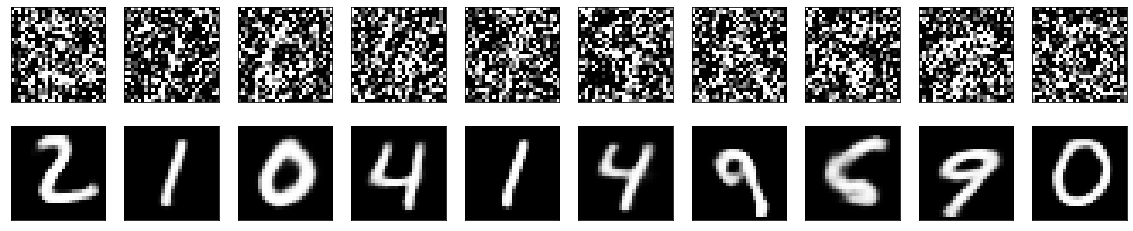

With adagrad optimizer and noise factor 0.2
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1156 - mean_squared_error: 0.0168 - val_loss: 0.1149 - val_mean_squared_error: 0.0166
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1134 - mean_squared_error: 0.0162 - val_loss: 0.1142 - val_mean_squared_error: 0.0165
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1129 - mean_squared_error: 0.0160 - val_loss: 0.1138 - val_mean_squared_error: 0.0163
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1125 - mean_squared_error: 0.0159 - val_loss: 0.1135 - val_mean_squared_error: 0.0162
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1122 - mean_squared_error: 0.0158 - val_loss: 0.1132 - val_mean_squared_error: 0.0162
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1119 - mean_squared_error: 0.0158 - val_loss: 0.1130 - val_mean_square

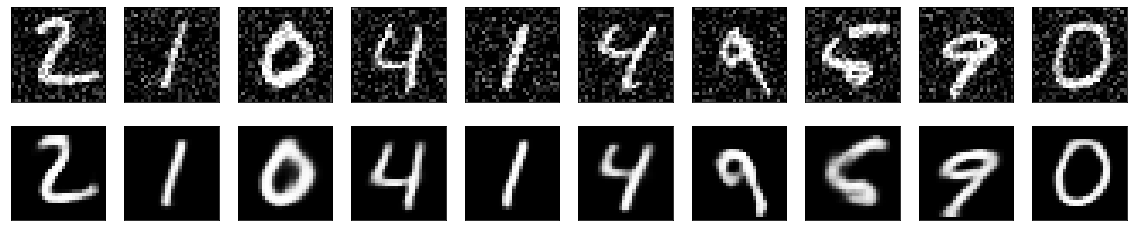

With adagrad optimizer and noise factor 0.4
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1118 - mean_squared_error: 0.0159 - val_loss: 0.1126 - val_mean_squared_error: 0.0162
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1116 - mean_squared_error: 0.0158 - val_loss: 0.1125 - val_mean_squared_error: 0.0161
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1114 - mean_squared_error: 0.0158 - val_loss: 0.1124 - val_mean_squared_error: 0.0161
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1113 - mean_squared_error: 0.0158 - val_loss: 0.1123 - val_mean_squared_error: 0.0161
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1112 - mean_squared_error: 0.0157 - val_loss: 0.1122 - val_mean_squared_error: 0.0160
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1111 - mean_squared_error: 0.0157 - val_loss: 0.1121 - val_mean_square

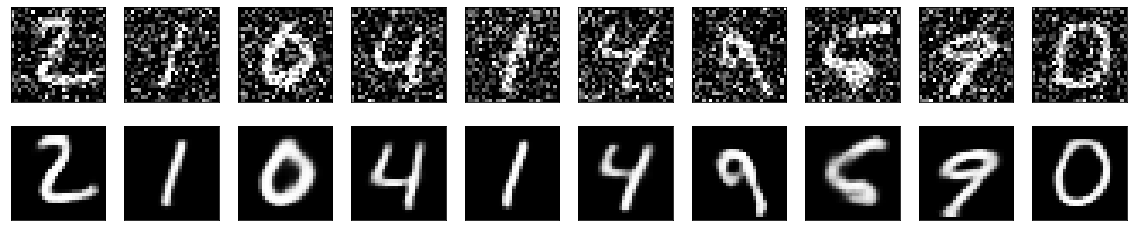

With adagrad optimizer and noise factor 0.6
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1184 - mean_squared_error: 0.0181 - val_loss: 0.1192 - val_mean_squared_error: 0.0184
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1182 - mean_squared_error: 0.0181 - val_loss: 0.1192 - val_mean_squared_error: 0.0184
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1181 - mean_squared_error: 0.0180 - val_loss: 0.1191 - val_mean_squared_error: 0.0184
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1181 - mean_squared_error: 0.0180 - val_loss: 0.1191 - val_mean_squared_error: 0.0184
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1180 - mean_squared_error: 0.0180 - val_loss: 0.1190 - val_mean_squared_error: 0.0183
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1180 - mean_squared_error: 0.0180 - val_loss: 0.1190 - val_mean_square

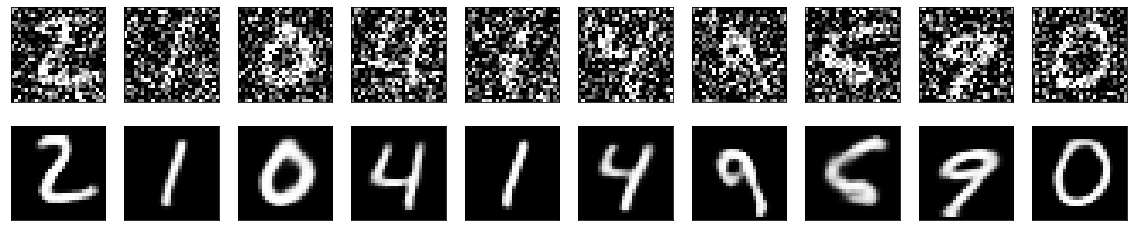

With adagrad optimizer and noise factor 0.8
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1325 - mean_squared_error: 0.0227 - val_loss: 0.1328 - val_mean_squared_error: 0.0229
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1323 - mean_squared_error: 0.0226 - val_loss: 0.1328 - val_mean_squared_error: 0.0228
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1323 - mean_squared_error: 0.0226 - val_loss: 0.1327 - val_mean_squared_error: 0.0228
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1322 - mean_squared_error: 0.0226 - val_loss: 0.1327 - val_mean_squared_error: 0.0228
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1322 - mean_squared_error: 0.0226 - val_loss: 0.1327 - val_mean_squared_error: 0.0228
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1321 - mean_squared_error: 0.0226 - val_loss: 0.1326 - val_mean_square

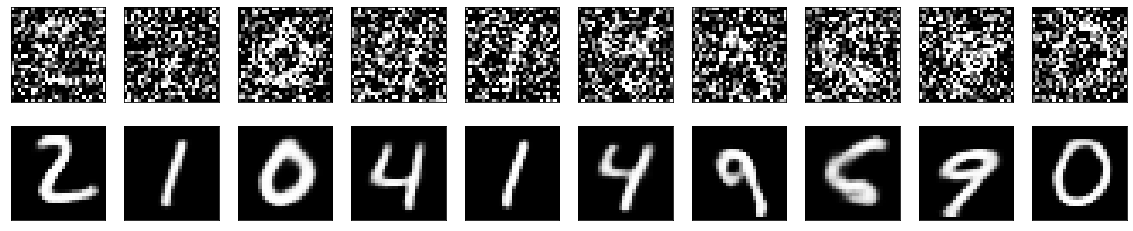

With adagrad optimizer and noise factor 0.9
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1418 - mean_squared_error: 0.0257 - val_loss: 0.1419 - val_mean_squared_error: 0.0257
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1417 - mean_squared_error: 0.0256 - val_loss: 0.1418 - val_mean_squared_error: 0.0257
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1416 - mean_squared_error: 0.0256 - val_loss: 0.1418 - val_mean_squared_error: 0.0257
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1415 - mean_squared_error: 0.0256 - val_loss: 0.1417 - val_mean_squared_error: 0.0257
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1415 - mean_squared_error: 0.0256 - val_loss: 0.1417 - val_mean_squared_error: 0.0257
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1414 - mean_squared_error: 0.0256 - val_loss: 0.1416 - val_mean_square

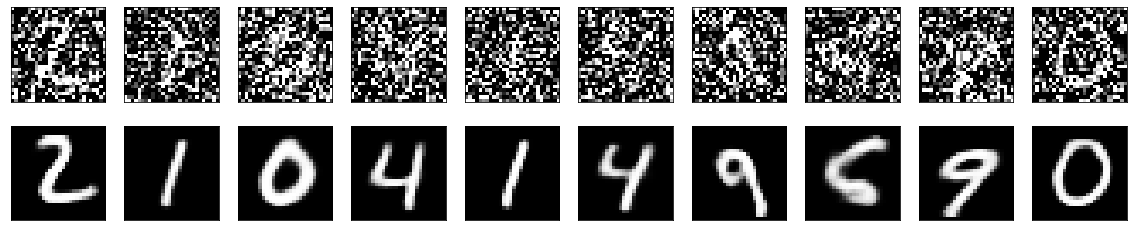

With adagrad optimizer and noise factor 0.99
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.1509 - mean_squared_error: 0.0286 - val_loss: 0.1511 - val_mean_squared_error: 0.0287
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1508 - mean_squared_error: 0.0286 - val_loss: 0.1510 - val_mean_squared_error: 0.0287
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1507 - mean_squared_error: 0.0285 - val_loss: 0.1510 - val_mean_squared_error: 0.0286
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1506 - mean_squared_error: 0.0285 - val_loss: 0.1509 - val_mean_squared_error: 0.0286
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1506 - mean_squared_error: 0.0285 - val_loss: 0.1509 - val_mean_squared_error: 0.0286
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1505 - mean_squared_error: 0.0285 - val_loss: 0.1508 - val_mean_squar

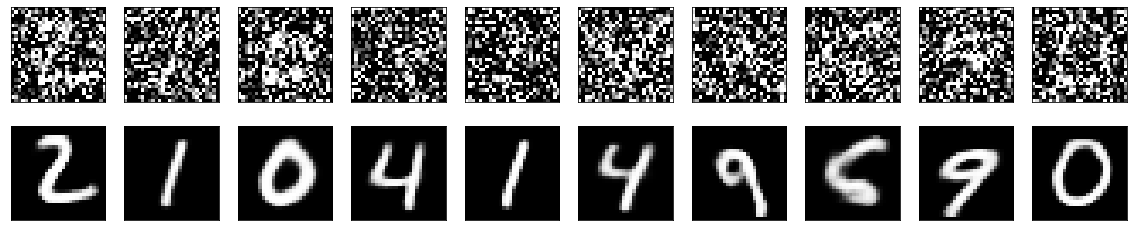

With nadam optimizer and noise factor 0.2
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0977 - mean_squared_error: 0.0115 - val_loss: 0.0940 - val_mean_squared_error: 0.0104
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0912 - mean_squared_error: 0.0095 - val_loss: 0.0917 - val_mean_squared_error: 0.0097
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0884 - mean_squared_error: 0.0087 - val_loss: 0.0892 - val_mean_squared_error: 0.0089
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0866 - mean_squared_error: 0.0081 - val_loss: 0.0888 - val_mean_squared_error: 0.0088
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0853 - mean_squared_error: 0.0077 - val_loss: 0.0862 - val_mean_squared_error: 0.0080
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0842 - mean_squared_error: 0.0074 - val_loss: 0.0858 - val_mean_squared_

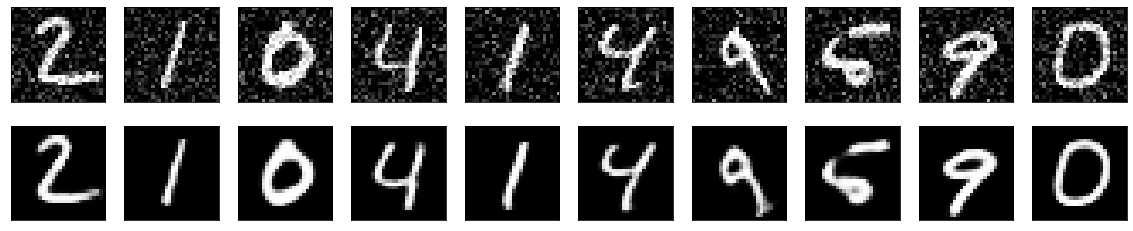

With nadam optimizer and noise factor 0.4
Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.0951 - mean_squared_error: 0.0108 - val_loss: 0.0955 - val_mean_squared_error: 0.0110
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0930 - mean_squared_error: 0.0102 - val_loss: 0.0947 - val_mean_squared_error: 0.0107
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0916 - mean_squared_error: 0.0097 - val_loss: 0.0943 - val_mean_squared_error: 0.0106
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0906 - mean_squared_error: 0.0095 - val_loss: 0.0959 - val_mean_squared_error: 0.0110
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0898 - mean_squared_error: 0.0092 - val_loss: 0.0947 - val_mean_squared_error: 0.0107
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0891 - mean_squared_error: 0.0090 - val_loss: 0.0937 - val_mean_squared_

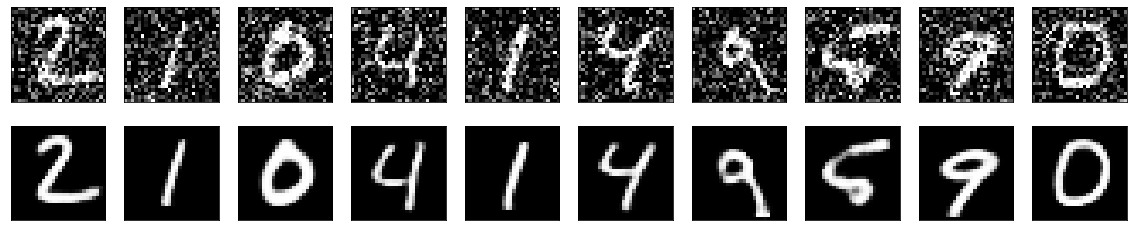

With nadam optimizer and noise factor 0.6
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1110 - mean_squared_error: 0.0159 - val_loss: 0.1109 - val_mean_squared_error: 0.0159
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1070 - mean_squared_error: 0.0147 - val_loss: 0.1100 - val_mean_squared_error: 0.0156
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1049 - mean_squared_error: 0.0140 - val_loss: 0.1090 - val_mean_squared_error: 0.0152
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1033 - mean_squared_error: 0.0135 - val_loss: 0.1096 - val_mean_squared_error: 0.0153
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1020 - mean_squared_error: 0.0131 - val_loss: 0.1097 - val_mean_squared_error: 0.0154
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1008 - mean_squared_error: 0.0127 - val_loss: 0.1101 - val_mean_squared_

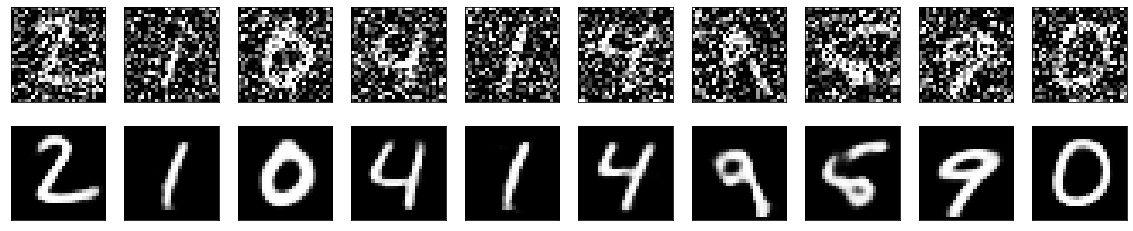

With nadam optimizer and noise factor 0.8
Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.1304 - mean_squared_error: 0.0220 - val_loss: 0.1290 - val_mean_squared_error: 0.0217
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1247 - mean_squared_error: 0.0203 - val_loss: 0.1291 - val_mean_squared_error: 0.0217
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1214 - mean_squared_error: 0.0193 - val_loss: 0.1285 - val_mean_squared_error: 0.0215
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1190 - mean_squared_error: 0.0186 - val_loss: 0.1292 - val_mean_squared_error: 0.0216
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1171 - mean_squared_error: 0.0180 - val_loss: 0.1287 - val_mean_squared_error: 0.0216
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1155 - mean_squared_error: 0.0175 - val_loss: 0.1296 - val_mean_squared_

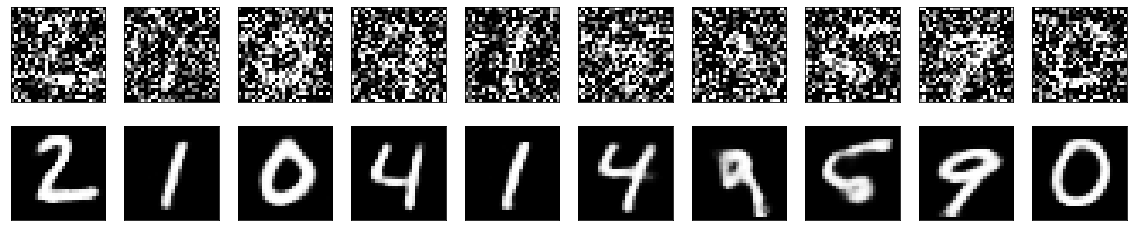

With nadam optimizer and noise factor 0.9
Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.1406 - mean_squared_error: 0.0253 - val_loss: 0.1388 - val_mean_squared_error: 0.0248
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1343 - mean_squared_error: 0.0235 - val_loss: 0.1409 - val_mean_squared_error: 0.0257
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1306 - mean_squared_error: 0.0223 - val_loss: 0.1387 - val_mean_squared_error: 0.0249
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1279 - mean_squared_error: 0.0215 - val_loss: 0.1387 - val_mean_squared_error: 0.0247
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1256 - mean_squared_error: 0.0208 - val_loss: 0.1392 - val_mean_squared_error: 0.0249
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1237 - mean_squared_error: 0.0202 - val_loss: 0.1389 - val_mean_squared_

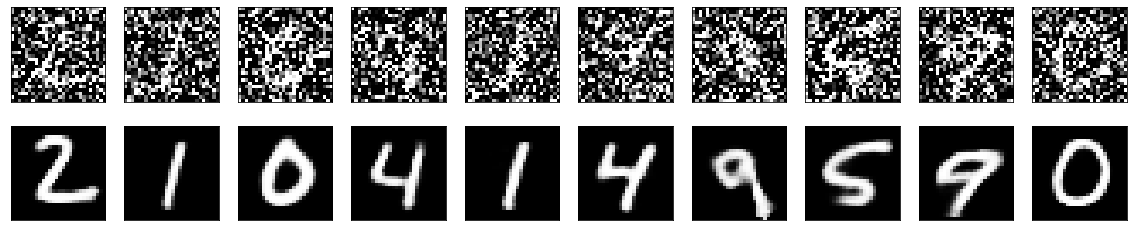

With nadam optimizer and noise factor 0.99
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1498 - mean_squared_error: 0.0283 - val_loss: 0.1480 - val_mean_squared_error: 0.0278
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1431 - mean_squared_error: 0.0263 - val_loss: 0.1468 - val_mean_squared_error: 0.0274
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1390 - mean_squared_error: 0.0251 - val_loss: 0.1475 - val_mean_squared_error: 0.0275
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1359 - mean_squared_error: 0.0241 - val_loss: 0.1470 - val_mean_squared_error: 0.0275
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1335 - mean_squared_error: 0.0233 - val_loss: 0.1473 - val_mean_squared_error: 0.0274
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1313 - mean_squared_error: 0.0227 - val_loss: 0.1479 - val_mean_squared

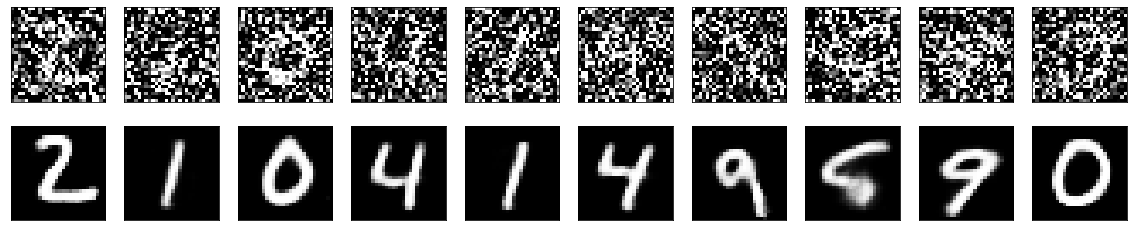

With sgd optimizer and noise factor 0.2
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1156 - mean_squared_error: 0.0167 - val_loss: 0.1140 - val_mean_squared_error: 0.0164
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1117 - mean_squared_error: 0.0157 - val_loss: 0.1120 - val_mean_squared_error: 0.0158
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1101 - mean_squared_error: 0.0153 - val_loss: 0.1107 - val_mean_squared_error: 0.0155
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1090 - mean_squared_error: 0.0150 - val_loss: 0.1098 - val_mean_squared_error: 0.0152
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1082 - mean_squared_error: 0.0147 - val_loss: 0.1090 - val_mean_squared_error: 0.0150
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1075 - mean_squared_error: 0.0145 - val_loss: 0.1084 - val_mean_squared_er

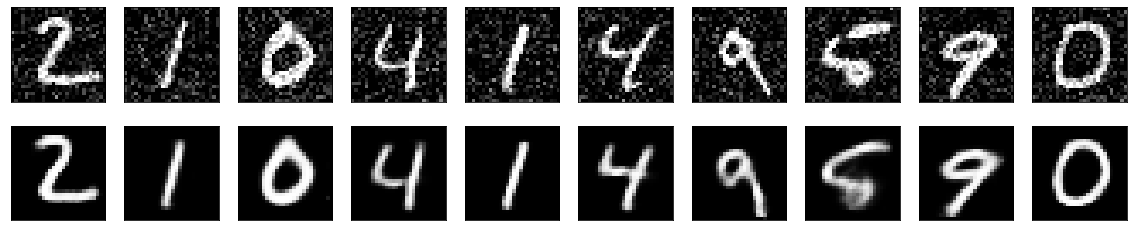

With sgd optimizer and noise factor 0.4
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1067 - mean_squared_error: 0.0144 - val_loss: 0.1078 - val_mean_squared_error: 0.0147
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1063 - mean_squared_error: 0.0143 - val_loss: 0.1075 - val_mean_squared_error: 0.0146
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1061 - mean_squared_error: 0.0142 - val_loss: 0.1073 - val_mean_squared_error: 0.0146
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1059 - mean_squared_error: 0.0141 - val_loss: 0.1071 - val_mean_squared_error: 0.0145
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1057 - mean_squared_error: 0.0141 - val_loss: 0.1070 - val_mean_squared_error: 0.0145
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1055 - mean_squared_error: 0.0140 - val_loss: 0.1068 - val_mean_squared_er

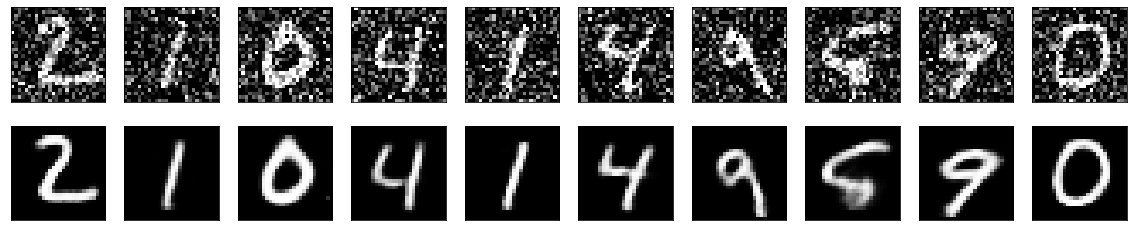

With sgd optimizer and noise factor 0.6
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1136 - mean_squared_error: 0.0167 - val_loss: 0.1145 - val_mean_squared_error: 0.0170
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1134 - mean_squared_error: 0.0166 - val_loss: 0.1144 - val_mean_squared_error: 0.0169
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1133 - mean_squared_error: 0.0166 - val_loss: 0.1143 - val_mean_squared_error: 0.0169
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1132 - mean_squared_error: 0.0166 - val_loss: 0.1142 - val_mean_squared_error: 0.0169
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1131 - mean_squared_error: 0.0165 - val_loss: 0.1141 - val_mean_squared_error: 0.0169
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1130 - mean_squared_error: 0.0165 - val_loss: 0.1141 - val_mean_squared_er

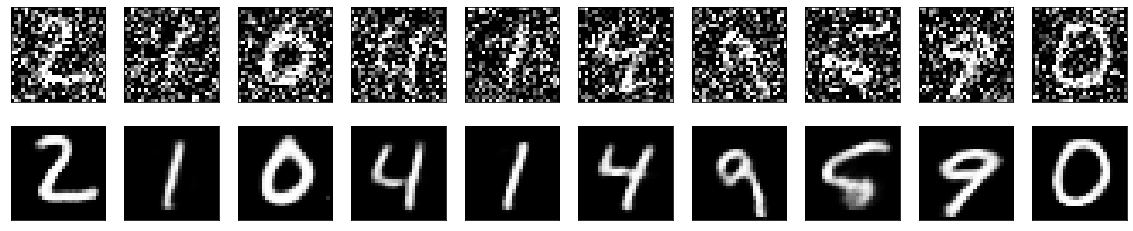

With sgd optimizer and noise factor 0.8
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1289 - mean_squared_error: 0.0216 - val_loss: 0.1293 - val_mean_squared_error: 0.0217
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1287 - mean_squared_error: 0.0215 - val_loss: 0.1292 - val_mean_squared_error: 0.0217
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1285 - mean_squared_error: 0.0215 - val_loss: 0.1291 - val_mean_squared_error: 0.0217
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1284 - mean_squared_error: 0.0215 - val_loss: 0.1290 - val_mean_squared_error: 0.0217
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1283 - mean_squared_error: 0.0214 - val_loss: 0.1289 - val_mean_squared_error: 0.0216
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1282 - mean_squared_error: 0.0214 - val_loss: 0.1289 - val_mean_squared_er

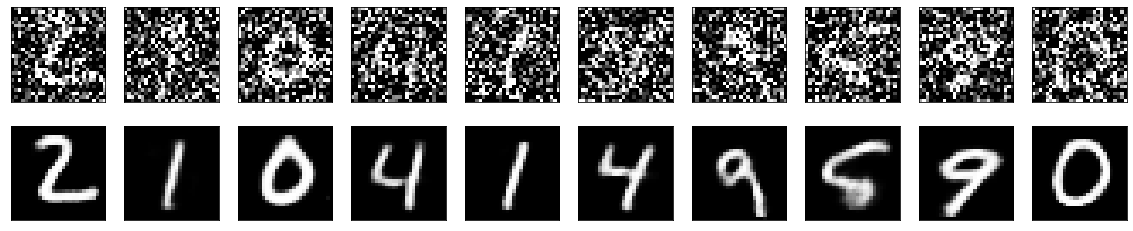

With sgd optimizer and noise factor 0.9
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1383 - mean_squared_error: 0.0246 - val_loss: 0.1383 - val_mean_squared_error: 0.0247
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1381 - mean_squared_error: 0.0246 - val_loss: 0.1382 - val_mean_squared_error: 0.0246
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1380 - mean_squared_error: 0.0245 - val_loss: 0.1381 - val_mean_squared_error: 0.0246
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1379 - mean_squared_error: 0.0245 - val_loss: 0.1380 - val_mean_squared_error: 0.0246
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1378 - mean_squared_error: 0.0245 - val_loss: 0.1380 - val_mean_squared_error: 0.0246
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1377 - mean_squared_error: 0.0244 - val_loss: 0.1379 - val_mean_squared_er

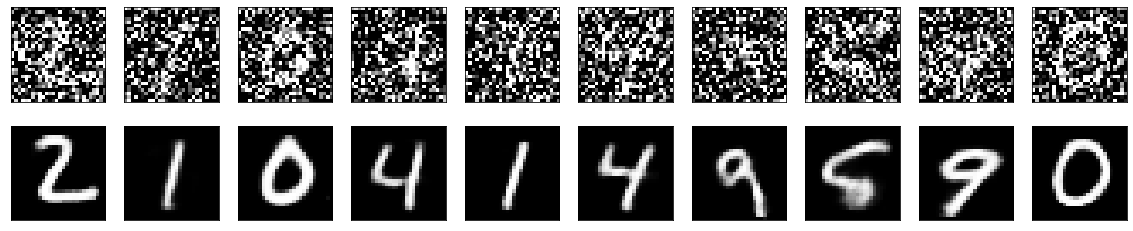

With sgd optimizer and noise factor 0.99
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1472 - mean_squared_error: 0.0274 - val_loss: 0.1473 - val_mean_squared_error: 0.0275
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1470 - mean_squared_error: 0.0274 - val_loss: 0.1472 - val_mean_squared_error: 0.0275
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1469 - mean_squared_error: 0.0273 - val_loss: 0.1471 - val_mean_squared_error: 0.0275
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1467 - mean_squared_error: 0.0273 - val_loss: 0.1471 - val_mean_squared_error: 0.0275
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1466 - mean_squared_error: 0.0273 - val_loss: 0.1470 - val_mean_squared_error: 0.0274
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1465 - mean_squared_error: 0.0273 - val_loss: 0.1470 - val_mean_squared_e

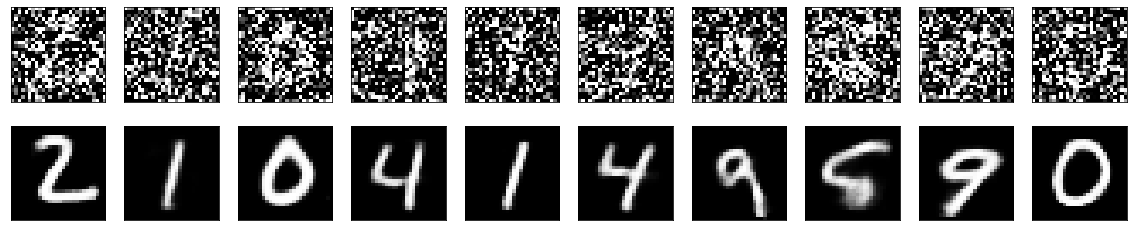

In [62]:
for i in ["adam","rmsprop","adadelta","adagrad","nadam","sgd"]:
    for j in [0.2,0.4,0.6,0.8,0.9,0.99]:
        train_model(j,input_image,decoded,i,10,128)